In [3]:
# import my data in jupyter
import pandas as pd
df = pd.read_csv("NTAD_Military_Bases_-1644289556481787667.csv")


In [6]:
# show the first 5 rows to verify if I loaded the exact document
df.head()

,OBJECTID,Country,Feature Description,Feature Name,Controlled Unclassified Information Indicator,Is FIRRMA Site,Is Joint Base,Media Identifier,Primary Key Identifier,Globally Unique Identifier,Site Name,Site Operational Status,Site Reporting Component Code,State Name Code,Shape__Area,Shape__Length
0,1,usa,na,Devens Reserve Forces Tng Area,no,no,no,na,,f9f35d60-b757-448a-9683-ebc2e518a310,Devens Reserve Forces Tng Area,act,usar,MA,0.002253,0.324854
1,2,usa,na,Fort Campbell,no,yes,no,na,,7dc7f20f-6983-4e95-a593-a3299fb37d9f,Fort Campbell,act,usa,TN,0.042675,1.388270
2,3,usa,na,NG Snake Creek TS Miramar,no,no,no,na,,e33df005-0713-4e64-8ebe-10dd700cbd60,NG Snake Creek TS Miramar,act,armyNationalGuard,FL,0.000116,0.046478
3,4,usa,na,Piñon Canyon Maneuver Site,no,yes,no,na,,0582f20a-d60a-4468-89e0-6fdade6f3e0c,Piñon Canyon Maneuver Site,act,usa,CO,0.097109,1.776971
4,5,usa,na,Stewart Annex,no,no,no,na,,0d629ab9-bead-4263-8d09-663887ea1100,Stewart Annex,act,usa,NY,0.000004,0.009891


In [7]:
# narrow my document down with just relevant columns
df_clean = df[[
   'Site Name',
    'Site Operational Status',
    'Site Reporting Component Code',
    'State Name Code',
    'Shape__Area',
    'Shape__Length' 
]].copy()

In [8]:
# Rename my new columns for easy readability
df_clean.columns = ['site_name', 'status', 'component', 'state', 'area', 'length']

In [10]:
# Clean the data
# check for missing values
df_clean.isnull().sum()

site_name    0
status       0
component    0
state        0
area         0
length       0
dtype: int64

In [11]:
# since we don't have missing values let's proceed
# Standarize the component text
df_clean['component'] = df_clean['component'].str.strip().str.upper()


In [13]:
# let's see how cleaned data looks like
df_clean.head()

,site_name,status,component,state,area,length
0,Devens Reserve Forces Tng Area,act,USAR,MA,0.002253,0.324854
1,Fort Campbell,act,USA,TN,0.042675,1.388270
2,NG Snake Creek TS Miramar,act,ARMYNATIONALGUARD,FL,0.000116,0.046478
3,Piñon Canyon Maneuver Site,act,USA,CO,0.097109,1.776971
4,Stewart Annex,act,USA,NY,0.000004,0.009891


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


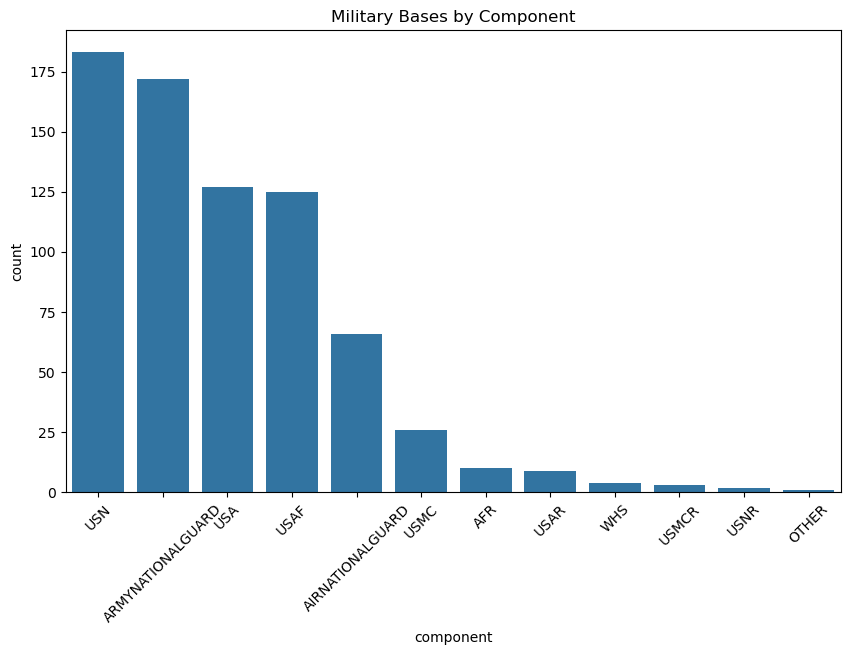

In [16]:
# let's plot Bases by Component
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='component', order=df_clean['component'].value_counts().index)
plt.title("Military Bases by Component")
plt.xticks(rotation=45)
plt.show()

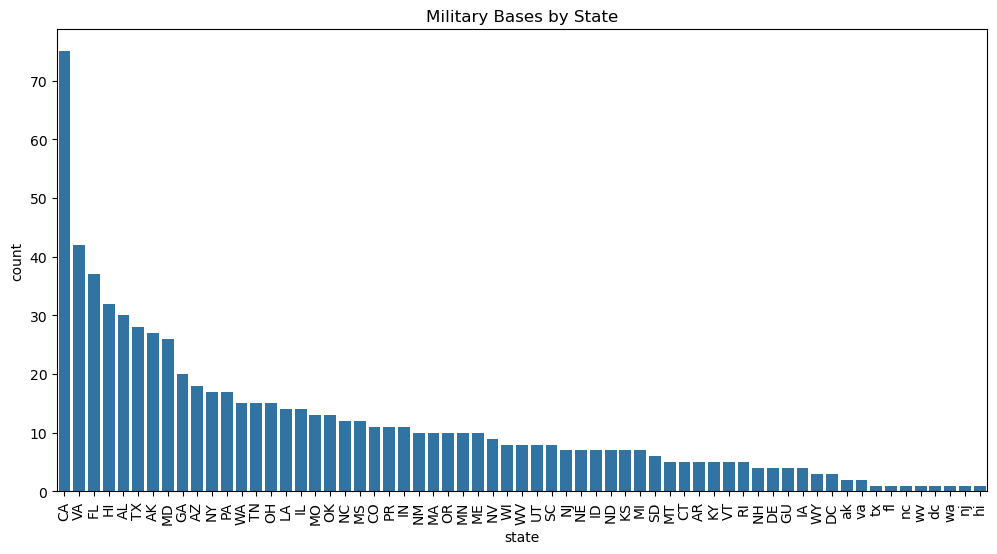

In [17]:
# Let's see Bases by State
plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='state', order=df_clean['state'].value_counts().index)
plt.title("Military Bases by State")
plt.xticks(rotation=90)
plt.show()

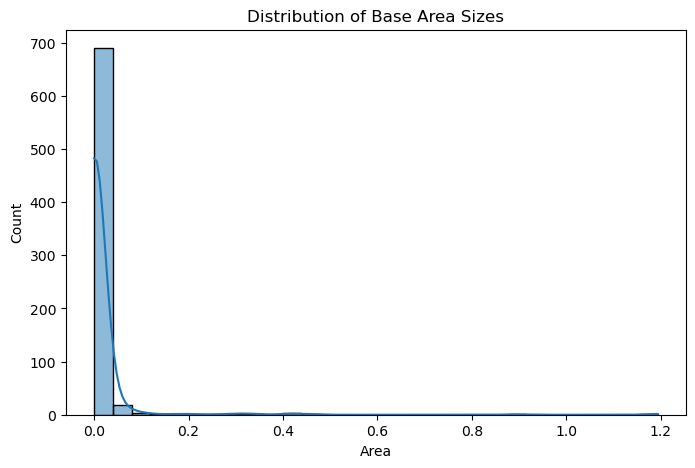

In [18]:
# Let's see Area Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['area'], bins=30, kde=True)
plt.title("Distribution of Base Area Sizes")
plt.xlabel("Area")
plt.show()


In [19]:
# Clustering /KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Encode categorical features
df_clean['component_code'] = LabelEncoder().fit_transform(df_clean['component'])
df_clean['status_code'] = LabelEncoder().fit_transform(df_clean['status'])

# Select features
X = df_clean[['component_code', 'status_code', 'area', 'length']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)

# Evaluate
score = silhouette_score(X, df_clean['cluster'])
print("Silhouette Score:", score)


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Silhouette Score: 0.6955974439505095


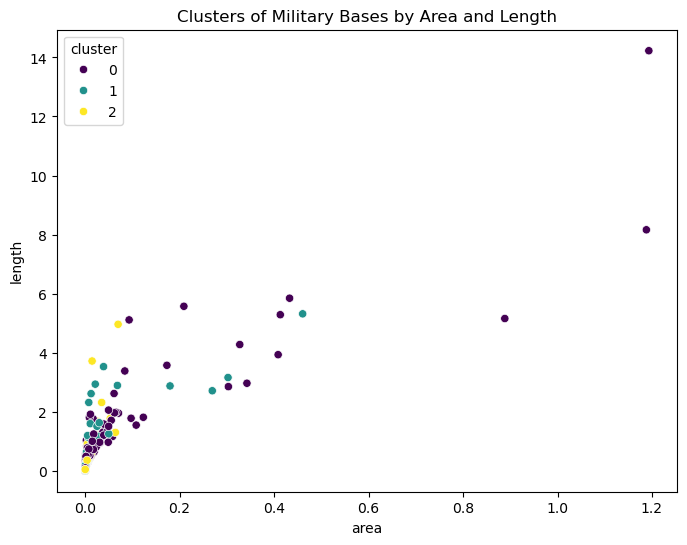

In [20]:
# Now let's visualize these Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='area', y='length', hue='cluster', palette='viridis')
plt.title("Clusters of Military Bases by Area and Length")
plt.show()

In [21]:
# Now let's export the cleaned data we will use in Power Bi
# Export for Power BI
df_clean.to_csv("cleaned_military_bases.csv", index=False)
